# UNIVARIATE CASE

## A. Generate 20 real number for the variable X from the uniform distribution U [0,1].

In [2]:
import numpy as np
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# uniform distribution of 20 real number
X_train=np.random.uniform(0,1,20)
X_train

array([0.77333432, 0.91805056, 0.95072335, 0.45880807, 0.08090425,
       0.96374892, 0.15276786, 0.67324846, 0.22464632, 0.90145704,
       0.00864481, 0.38311258, 0.00264796, 0.1275323 , 0.93828847,
       0.25865437, 0.11411363, 0.93500312, 0.91233388, 0.26365673])

## B. Construct the training set T = { ($x_{1}$, $y_{1}$), ($x_{2}$, $y_{2}$), ... , ($x_{20}$, $y_{20}$)} using the relation :

##$Y_{i}$  = sin(2 π $x_{i}$) + $ε_{i}$ where $ε_{i}$ ~ N(0,0.25)


In [4]:
Y_train =[]

for x_val in X_train:
    Yi = math.sin(2 * math.pi * x_val) + np.random.uniform(0, 0.25) 
    Y_train.append(Yi)

# For better understanding, let's convert X and Y training dataset into a dataframe
df_train = pd.DataFrame(data=(X_train,Y_train),index=['X_train','Y_train'])
df_train = df_train.T
df_train

,X_train,Y_train
0,0.773334,-0.782843
1,0.918051,-0.308884
2,0.950723,-0.152586
3,0.458808,0.359577
4,0.080904,0.510590
5,0.963749,-0.181297
6,0.152768,1.057762
7,0.673248,-0.638807
8,0.224646,1.235155
9,0.901457,-0.418401


## C. In the similar way construct a testing set of size 50, i.e. Test = { ($x'_{1}$, $y'_{1}$), ($x'_{2}$, $y'_{2}$), ... , ($x'_{50}$, $y'_{50}$)}

In [5]:
X_test = np.random.uniform(0,1,50)
Y_test = []

for i in X_test:
    Yi = math.sin(2 *math.pi*i) + np.random.uniform(0,0.25) 
    Y_test.append(Yi)

# For better understanding, let's convert X and Y testing dataset into a dataframe
df_test = pd.DataFrame(data=(X_test,Y_test),index=['X_test','Y_test'])
df_test = df_test.T
df_test

,X_test,Y_test
0,0.857862,-0.674367
1,0.554701,-0.127536
2,0.243202,1.122251
3,0.829974,-0.746957
4,0.762717,-0.883136
5,0.393828,0.866895
6,0.623698,-0.558863
7,0.860840,-0.595653
8,0.534568,0.004776
9,0.009501,0.272460


## D. Estimate the Regularized Least Squared Polynomial Regression model of order M= 1, 2, 3, 9 using the training set T.


## Example
## 1. For M=1 , we need to estimate F(x) = $β_{1}$x +  $β_{0}$
## 2. For M = 2,  F(x) =  $β_{2}$ $x^{2}$ +  $β_{1}$x +  $β_{0}$

### In the previous assignment, we observed that, as our value of the coefficients increases, this results in the problem  of overfitting. Overfitting occurs when the trained model performs well on the training data and performs poorly on the testing dataset. This can be taken care of by following steps :

### 1. By increasing the training dataset to better train our model.
### 2. Regularization methods that will apply a penalizing term (reducing the weights and biases) to overcome overfitting.


### Let's see how our graph looks like without "Regularization"...

In [6]:
# Find LSPR for M = 1, 2, 3, 9

# Least Square Polynomial Regression
def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

LSP_ord_1 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 1))
LSP_ord_2 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 2))
LSP_ord_3 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 3))
LSP_ord_9 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 9))

In [7]:
# Find the predicted values for M = 1, 2, 3, 9

# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(df_test['X_test'])
y_predicted_m1 = []
y_predicted_m2 = []
y_predicted_m3 = []
y_predicted_m9 = []

# M = 1
for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += LSP_ord_1[0][deg] * math.pow(val, deg)
  y_predicted_m1.append(y_val)

df_predicted_m1 = pd.DataFrame(data=(X, y_predicted_m1),index=['X', 'Y_predicted']).T

# M = 2
for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += LSP_ord_2[0][deg] * math.pow(val, deg)
  y_predicted_m2.append(y_val)

df_predicted_m2 = pd.DataFrame(data=(X, y_predicted_m2),index=['X', 'Y_predicted']).T

# M = 3
for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += LSP_ord_3[0][deg] * math.pow(val, deg)
  y_predicted_m3.append(y_val)

df_predicted_m3 = pd.DataFrame(data=(X, y_predicted_m3),index=['X', 'Y_predicted']).T

# M = 9
for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += LSP_ord_9[0][deg] * math.pow(val, deg)
  y_predicted_m9.append(y_val)

df_predicted_m9 = pd.DataFrame(data=(X, y_predicted_m9),index=['X', 'Y_predicted']).T

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

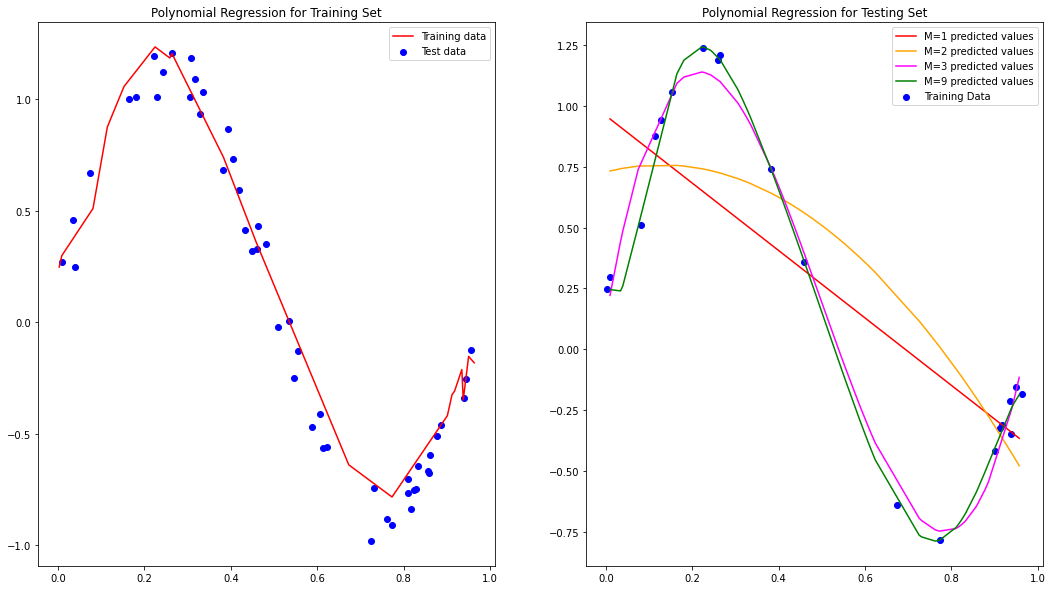

In [8]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m1 = df_predicted_m1.sort_values(by=['X'])
df_pred_sort_m2 = df_predicted_m2.sort_values(by=['X'])
df_pred_sort_m3 = df_predicted_m3.sort_values(by=['X'])
df_pred_sort_m9 = df_predicted_m9.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m1['X'], df_pred_sort_m1['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m2['X'], df_pred_sort_m2['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m3['X'], df_pred_sort_m3['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m9['X'], df_pred_sort_m9['Y_predicted'], color='green')
axes[1].legend(['M=1 predicted values', 'M=2 predicted values', 'M=3 predicted values', 'M=9 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

## On comparing the values of coefficients $β_{1}$, $β_{2}$, $β_{2}$ ... for increasing order of M, we notice that the value of coefficients increases significantly on going from order 3 to order 9.

In [9]:
print(f'The coefficiet for M=1: {LSP_ord_1}\n')
print(f'The coefficiet for M=2: {LSP_ord_2}\n')
print(f'The coefficiet for M=3: {LSP_ord_3}\n')
print(f'The coefficiet for M=9: {LSP_ord_9}\n')

The coefficiet for M=1: [[ 0.9585397 -1.3821885]]

The coefficiet for M=2: [[ 0.72762533  0.45994952 -1.7956258 ]]

The coefficiet for M=3: [[  0.12591205  10.36939541 -30.72868516  20.51216185]]

The coefficiet for M=9: [[ 3.09846844e-01 -9.12835011e+00  2.64315671e+02 -1.84288951e+03
   6.32735032e+03 -1.27522216e+04  1.57637431e+04 -1.17886438e+04
   4.93696122e+03 -8.99979496e+02]]



## We can avoid overfitting by using so-called ''regularization''. How does it work? Usually, a function is prone to be overfitting when its coefficients (weighting values) has big value and not well distributed. Thus, we will force our training process to make those coefficients small by adding a term in our cost function. This process also makes those coefficients more well distributed. Here is our new cost function. (Questions E, F, G, H answered collectively for given value of M=1, 2, 3, 9)

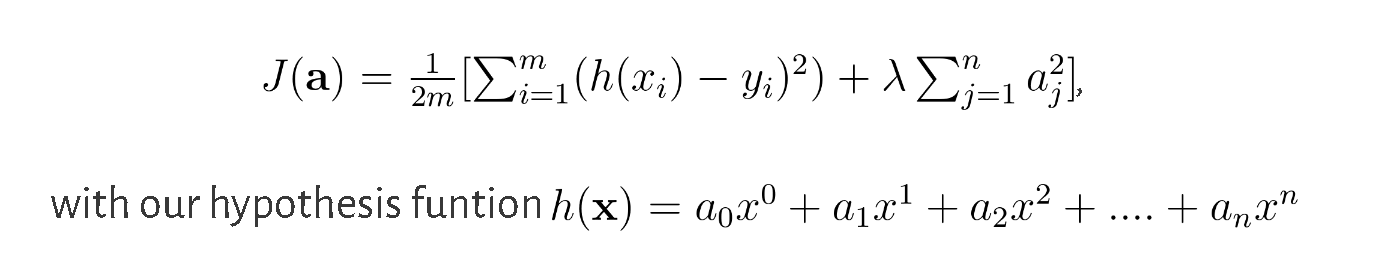

On solving, we get a = [$a_{0}$, $a_{1}$, $a_{2}$, ... , $a_{n}$] as

$({X^{T}} X+λ.I )^{-1}$ . $X^{T}$.y

In [10]:
# Least Square Polynomial Regression
def regularized_LSPR(x_dataset, y_dataset, degree, Lambda):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  lam_I = np.identity(degree+1)*Lambda
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X = np.add(X_Trans_X, lam_I)
  X_Trans_X_Inv = X_Trans_X.I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

### For order m=1

#### List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [11]:
reg_LSP_ord_1_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 0))
reg_LSP_ord_1_1 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 1))
reg_LSP_ord_1_5 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 5))
reg_LSP_ord_1_10 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 10))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_1_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_1_1}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_1_5}')
print(f'coefficient value with regularization and λ = 10: {reg_LSP_ord_1_10}')

coefficient value with regularization and λ = 0: [[ 0.9585397 -1.3821885]]
coefficient value with regularization and λ = 1: [[ 0.68884511 -0.91363662]]
coefficient value with regularization and λ = 5: [[ 0.35871684 -0.36613579]]
coefficient value with regularization and λ = 10: [[ 0.24229897 -0.19694573]]


#### Obtain the prediction on testing set for regularized least squared polynomial regression models for order M =1,2,3 and 9.

In [12]:
y_predicted_m1_0, y_predicted_m1_1, y_predicted_m1_5, y_predicted_m1_10 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_0[0][deg] * math.pow(val, deg)
  y_predicted_m1_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_1[0][deg] * math.pow(val, deg)
  y_predicted_m1_1.append(y_val)

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_5[0][deg] * math.pow(val, deg)
  y_predicted_m1_5.append(y_val)

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_10[0][deg] * math.pow(val, deg)
  y_predicted_m1_10.append(y_val)

df_predicted_m1_0 = pd.DataFrame(data=(X, y_predicted_m1_0),index=['X', 'Y_predicted']).T
df_predicted_m1_1 = pd.DataFrame(data=(X, y_predicted_m1_1),index=['X', 'Y_predicted']).T
df_predicted_m1_5 = pd.DataFrame(data=(X, y_predicted_m1_5),index=['X', 'Y_predicted']).T
df_predicted_m1_10 = pd.DataFrame(data=(X, y_predicted_m1_10),index=['X', 'Y_predicted']).T

#### Plot the estimate obtained by regularized least squared polynomial regression models for training set along with $y_{1}$, $y_{2}$, $y_{3}$, ..., $y_{20}$ AND for testing set along with $y'_{1}$, $y'_{2}$, $y'_{3}$, ..., $y'_{50}$

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

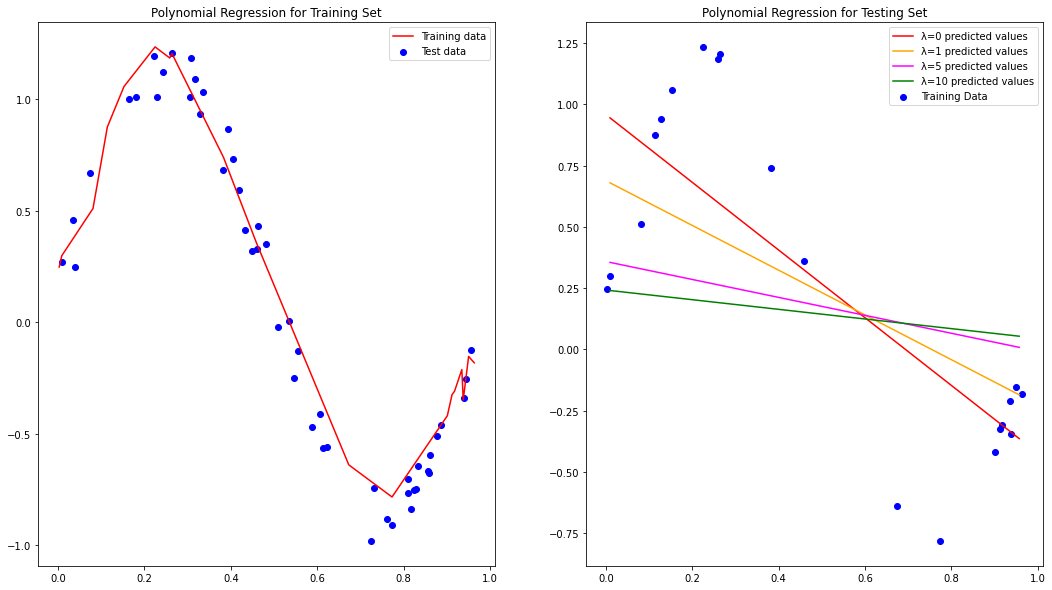

In [13]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m1_0 = df_predicted_m1_0.sort_values(by=['X'])
df_pred_sort_m1_1 = df_predicted_m1_1.sort_values(by=['X'])
df_pred_sort_m1_5 = df_predicted_m1_5.sort_values(by=['X'])
df_pred_sort_m1_10 = df_predicted_m1_10.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m1_0['X'], df_pred_sort_m1_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m1_1['X'], df_pred_sort_m1_1['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m1_5['X'], df_pred_sort_m1_5['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m1_10['X'], df_pred_sort_m1_10['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=1 predicted values', 'λ=5 predicted values', 'λ=10 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### Study the effect of regularization parameter λ on testing RMSE and flexibility of curve

##### λ = 0

In [14]:
y_vs_y_hat_m1 = pd.DataFrame(data=(np.array(df_predicted_m1_0['Y_predicted']), Y_test),index=['y predicted m1 λ0','Y_train']).T
y_vs_y_hat_m1['sum of square error'] = (y_vs_y_hat_m1['y predicted m1 λ0'] - y_vs_y_hat_m1['Y_train'])**2

rmse_m1_λ0 = 0

rmse_m1_λ0 = y_vs_y_hat_m1['sum of square error'].sum() / len(y_vs_y_hat_m1)
rmse_m1_λ0 = math.sqrt(rmse_m1_λ0)
rmse_m1_λ0

0.4785932851704155

##### λ = 1

In [15]:
y_vs_y_hat_m1 = pd.DataFrame(data=(np.array(df_predicted_m1_1['Y_predicted']), Y_test),index=['y predicted m1 λ1','Y_train']).T
y_vs_y_hat_m1['sum of square error'] = (y_vs_y_hat_m1['y predicted m1 λ1'] - y_vs_y_hat_m1['Y_train'])**2

rmse_m1_λ1 = 0

rmse_m1_λ1 = y_vs_y_hat_m1['sum of square error'].sum() / len(y_vs_y_hat_m1)
rmse_m1_λ1 = math.sqrt(rmse_m1_λ1)
rmse_m1_λ1

0.5417004877979047

##### λ = 5

In [16]:
y_vs_y_hat_m1 = pd.DataFrame(data=(np.array(df_predicted_m1_5['Y_predicted']), Y_test),index=['y predicted m1 λ5','Y_train']).T
y_vs_y_hat_m1['sum of square error'] = (y_vs_y_hat_m1['y predicted m1 λ5'] - y_vs_y_hat_m1['Y_train'])**2

rmse_m1_λ5 = 0

rmse_m1_λ5 = y_vs_y_hat_m1['sum of square error'].sum() / len(y_vs_y_hat_m1)
rmse_m1_λ5 = math.sqrt(rmse_m1_λ5)
rmse_m1_λ5

0.6389435597761564

##### λ = 10

In [17]:
y_vs_y_hat_m1 = pd.DataFrame(data=(np.array(df_predicted_m1_10['Y_predicted']), Y_test),index=['y predicted m1 λ10','Y_train']).T
y_vs_y_hat_m1['sum of square error'] = (y_vs_y_hat_m1['y predicted m1 λ10'] - y_vs_y_hat_m1['Y_train'])**2

rmse_m1_λ10 = 0

rmse_m1_λ10 = y_vs_y_hat_m1['sum of square error'].sum() / len(y_vs_y_hat_m1)
rmse_m1_λ10 = math.sqrt(rmse_m1_λ10)
rmse_m1_λ10

0.6719783346755407

### For order m=2

#### List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [18]:
reg_LSP_ord_2_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 2, 0))
reg_LSP_ord_2_1 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 2, 1))
reg_LSP_ord_2_5 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 2, 5))
reg_LSP_ord_2_10 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 2, 10))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_2_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_2_1}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_2_5}')
print(f'coefficient value with regularization and λ = 10: {reg_LSP_ord_2_10}')

coefficient value with regularization and λ = 0: [[ 0.72762533  0.45994952 -1.7956258 ]]
coefficient value with regularization and λ = 1: [[ 0.69528017 -0.42647255 -0.6503488 ]]
coefficient value with regularization and λ = 5: [[ 0.40606043 -0.23433781 -0.3243364 ]]
coefficient value with regularization and λ = 10: [[ 0.27454045 -0.14127085 -0.19745782]]


#### Obtain the prediction on testing set for regularized least squared
polynomial regression models for order M =1,2,3 and 9.

In [19]:
y_predicted_m2_0, y_predicted_m2_1, y_predicted_m2_5, y_predicted_m2_10 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_0[0][deg] * math.pow(val, deg)
  y_predicted_m2_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_1[0][deg] * math.pow(val, deg)
  y_predicted_m2_1.append(y_val)

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_5[0][deg] * math.pow(val, deg)
  y_predicted_m2_5.append(y_val)

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_10[0][deg] * math.pow(val, deg)
  y_predicted_m2_10.append(y_val)

df_predicted_m2_0 = pd.DataFrame(data=(X, y_predicted_m2_0),index=['X', 'Y_predicted']).T
df_predicted_m2_1 = pd.DataFrame(data=(X, y_predicted_m2_1),index=['X', 'Y_predicted']).T
df_predicted_m2_5 = pd.DataFrame(data=(X, y_predicted_m2_5),index=['X', 'Y_predicted']).T
df_predicted_m2_10 = pd.DataFrame(data=(X, y_predicted_m2_10),index=['X', 'Y_predicted']).T

#### Plot the estimate obtained by regularized least squared polynomial regression models for training set along with $y_{1}$, $y_{2}$, $y_{3}$, ..., $y_{20}$ AND for testing set along with $y'_{1}$, $y'_{2}$, $y'_{3}$, ..., $y'_{50}$

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

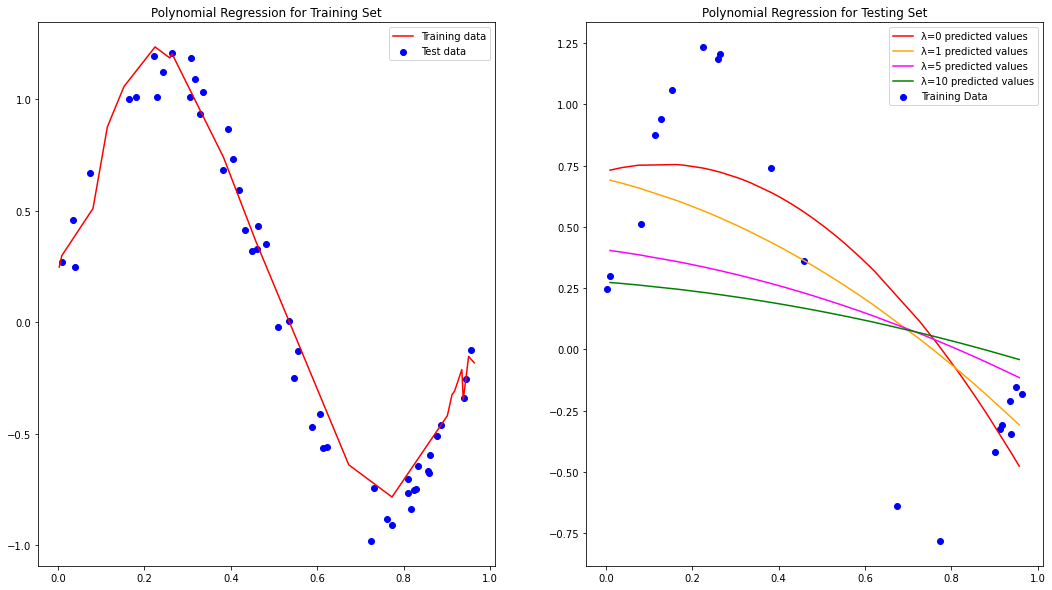

In [20]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m2_0 = df_predicted_m2_0.sort_values(by=['X'])
df_pred_sort_m2_1 = df_predicted_m2_1.sort_values(by=['X'])
df_pred_sort_m2_5 = df_predicted_m2_5.sort_values(by=['X'])
df_pred_sort_m2_10 = df_predicted_m2_10.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m2_0['X'], df_pred_sort_m2_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m2_1['X'], df_pred_sort_m2_1['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m2_5['X'], df_pred_sort_m2_5['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m2_10['X'], df_pred_sort_m2_10['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=1 predicted values', 'λ=5 predicted values', 'λ=10 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### Study the effect of regularization parameter λ on testing RMSE and flexibility of curve

##### λ = 0

In [21]:
y_vs_y_hat_m2 = pd.DataFrame(data=(np.array(df_predicted_m2_0['Y_predicted']), Y_test),index=['y predicted m2 λ0','Y_train']).T
y_vs_y_hat_m2['sum of square error'] = (y_vs_y_hat_m2['y predicted m2 λ0'] - y_vs_y_hat_m2['Y_train'])**2

rmse_m2_λ0 = 0

rmse_m2_λ0 = y_vs_y_hat_m2['sum of square error'].sum() / len(y_vs_y_hat_m2)
rmse_m2_λ0 = math.sqrt(rmse_m2_λ0)
rmse_m2_λ0

0.5163084804077739

##### λ = 1

In [22]:
y_vs_y_hat_m2 = pd.DataFrame(data=(np.array(df_predicted_m2_1['Y_predicted']), Y_test),index=['y predicted m2 λ1','Y_train']).T
y_vs_y_hat_m2['sum of square error'] = (y_vs_y_hat_m2['y predicted m2 λ1'] - y_vs_y_hat_m2['Y_train'])**2

rmse_m2_λ1 = 0

rmse_m2_λ1 = y_vs_y_hat_m2['sum of square error'].sum() / len(y_vs_y_hat_m2)
rmse_m2_λ1 = math.sqrt(rmse_m2_λ1)
rmse_m2_λ1

0.516553260049837

##### λ = 5

In [23]:
y_vs_y_hat_m2 = pd.DataFrame(data=(np.array(df_predicted_m2_5['Y_predicted']), Y_test),index=['y predicted m2 λ5','Y_train']).T
y_vs_y_hat_m2['sum of square error'] = (y_vs_y_hat_m2['y predicted m2 λ5'] - y_vs_y_hat_m2['Y_train'])**2

rmse_m2_λ5 = 0

rmse_m2_λ5 = y_vs_y_hat_m2['sum of square error'].sum() / len(y_vs_y_hat_m2)
rmse_m2_λ5 = math.sqrt(rmse_m2_λ5)
rmse_m2_λ5

0.5961538945386802

##### λ = 10

In [24]:
y_vs_y_hat_m2 = pd.DataFrame(data=(np.array(df_predicted_m2_10['Y_predicted']), Y_test),index=['y predicted m2 λ10','Y_train']).T
y_vs_y_hat_m2['sum of square error'] = (y_vs_y_hat_m2['y predicted m2 λ10'] - y_vs_y_hat_m2['Y_train'])**2

rmse_m2_λ10 = 0

rmse_m2_λ10 = y_vs_y_hat_m2['sum of square error'].sum() / len(y_vs_y_hat_m2)
rmse_m2_λ10 = math.sqrt(rmse_m2_λ0)
rmse_m2_λ10

0.7185460878800843

### For order m=3

#### List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [25]:
reg_LSP_ord_3_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 3, 0))
reg_LSP_ord_3_1 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 3, 1))
reg_LSP_ord_3_5 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 3, 5))
reg_LSP_ord_3_10 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 3, 10))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_3_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_3_1}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_3_5}')
print(f'coefficient value with regularization and λ = 10: {reg_LSP_ord_3_10}')

coefficient value with regularization and λ = 0: [[  0.12591205  10.36939541 -30.72868516  20.51216185]]
coefficient value with regularization and λ = 1: [[ 0.68665682 -0.29598857 -0.47756091 -0.37127829]]
coefficient value with regularization and λ = 5: [[ 0.42375061 -0.1721112  -0.25695338 -0.23919913]]
coefficient value with regularization and λ = 10: [[ 0.29055077 -0.10976771 -0.16514986 -0.15761938]]


#### Obtain the prediction on testing set for regularized least squared
polynomial regression models for order M =1,2,3 and 9.

In [26]:
y_predicted_m3_0, y_predicted_m3_1, y_predicted_m3_5, y_predicted_m3_10 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += reg_LSP_ord_3_0[0][deg] * math.pow(val, deg)
  y_predicted_m3_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += reg_LSP_ord_3_1[0][deg] * math.pow(val, deg)
  y_predicted_m3_1.append(y_val)

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += reg_LSP_ord_3_5[0][deg] * math.pow(val, deg)
  y_predicted_m3_5.append(y_val)

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += reg_LSP_ord_3_10[0][deg] * math.pow(val, deg)
  y_predicted_m3_10.append(y_val)

df_predicted_m3_0 = pd.DataFrame(data=(X, y_predicted_m3_0),index=['X', 'Y_predicted']).T
df_predicted_m3_1 = pd.DataFrame(data=(X, y_predicted_m3_1),index=['X', 'Y_predicted']).T
df_predicted_m3_5 = pd.DataFrame(data=(X, y_predicted_m3_5),index=['X', 'Y_predicted']).T
df_predicted_m3_10 = pd.DataFrame(data=(X, y_predicted_m3_10),index=['X', 'Y_predicted']).T

#### Plot the estimate obtained by regularized least squared polynomial regression models for training set along with $y_{1}$, $y_{2}$, $y_{3}$, ..., $y_{20}$ AND for testing set along with $y'_{1}$, $y'_{2}$, $y'_{3}$, ..., $y'_{50}$

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

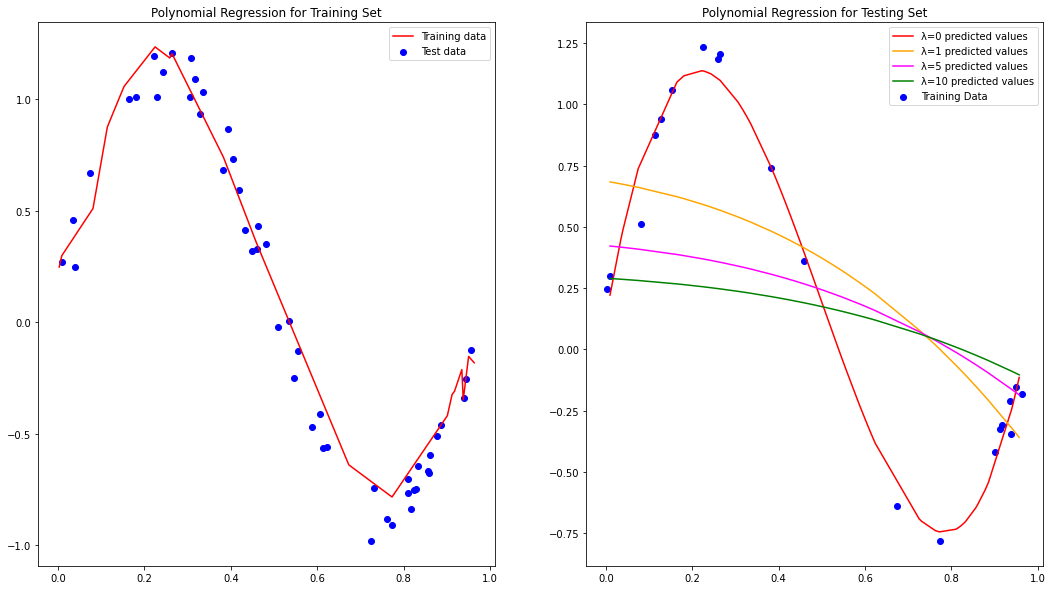

In [27]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m3_0 = df_predicted_m3_0.sort_values(by=['X'])
df_pred_sort_m3_1 = df_predicted_m3_1.sort_values(by=['X'])
df_pred_sort_m3_5 = df_predicted_m3_5.sort_values(by=['X'])
df_pred_sort_m3_10 = df_predicted_m3_10.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m3_0['X'], df_pred_sort_m3_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m3_1['X'], df_pred_sort_m3_1['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m3_5['X'], df_pred_sort_m3_5['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m3_10['X'], df_pred_sort_m3_10['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=1 predicted values', 'λ=5 predicted values', 'λ=10 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### Study the effect of regularization parameter λ on testing RMSE and flexibility of curve

##### λ = 0

In [28]:
y_vs_y_hat_m3 = pd.DataFrame(data=(np.array(df_predicted_m3_0['Y_predicted']), Y_test),index=['y predicted m3 λ0','Y_train']).T
y_vs_y_hat_m3['sum of square error'] = (y_vs_y_hat_m3['y predicted m3 λ0'] - y_vs_y_hat_m3['Y_train'])**2

rmse_m3_λ0 = 0

rmse_m3_λ0 = y_vs_y_hat_m3['sum of square error'].sum() / len(y_vs_y_hat_m3)
rmse_m3_λ0 = math.sqrt(rmse_m3_λ0)
rmse_m3_λ0

0.11382574564327845

##### λ = 1

In [29]:
y_vs_y_hat_m3 = pd.DataFrame(data=(np.array(df_predicted_m3_1['Y_predicted']), Y_test),index=['y predicted m3 λ1','Y_train']).T
y_vs_y_hat_m3['sum of square error'] = (y_vs_y_hat_m3['y predicted m3 λ1'] - y_vs_y_hat_m3['Y_train'])**2

rmse_m3_λ1 = 0

rmse_m3_λ1 = y_vs_y_hat_m3['sum of square error'].sum() / len(y_vs_y_hat_m3)
rmse_m3_λ1 = math.sqrt(rmse_m3_λ1)
rmse_m3_λ1

0.5222464003084243

##### λ = 5

In [30]:
y_vs_y_hat_m3 = pd.DataFrame(data=(np.array(df_predicted_m3_5['Y_predicted']), Y_test),index=['y predicted m3 λ5','Y_train']).T
y_vs_y_hat_m3['sum of square error'] = (y_vs_y_hat_m3['y predicted m3 λ5'] - y_vs_y_hat_m3['Y_train'])**2

rmse_m3_λ5 = 0

rmse_m3_λ5 = y_vs_y_hat_m3['sum of square error'].sum() / len(y_vs_y_hat_m3)
rmse_m3_λ5 = math.sqrt(rmse_m3_λ5)
rmse_m3_λ5

0.5814177388097354

##### λ = 10

In [31]:
y_vs_y_hat_m3 = pd.DataFrame(data=(np.array(df_predicted_m3_10['Y_predicted']), Y_test),index=['y predicted m3 λ10','Y_train']).T
y_vs_y_hat_m3['sum of square error'] = (y_vs_y_hat_m3['y predicted m3 λ10'] - y_vs_y_hat_m3['Y_train'])**2

rmse_m3_λ10 = 0

rmse_m3_λ10 = y_vs_y_hat_m3['sum of square error'].sum() / len(y_vs_y_hat_m3)
rmse_m3_λ10 = math.sqrt(rmse_m3_λ10)
rmse_m3_λ10

0.6222769290580273

### For order m=9

#### List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [32]:
reg_LSP_ord_9_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 9, 0))
reg_LSP_ord_9_01 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 9, 0.01))
reg_LSP_ord_9_001 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 9, 0.001))
reg_LSP_ord_9_0001 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 9, 0.0001))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_9_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_9_01}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_9_001}')
print(f'coefficient value with regularization and λ = 10: {reg_LSP_ord_9_0001}')

coefficient value with regularization and λ = 0: [[ 3.09846844e-01 -9.12835011e+00  2.64315671e+02 -1.84288951e+03
   6.32735032e+03 -1.27522216e+04  1.57637431e+04 -1.17886438e+04
   4.93696122e+03 -8.99979496e+02]]
coefficient value with regularization and λ = 1: [[ 0.55839559  2.72806341 -4.63668823 -2.85956879 -0.58845042  0.79316131
   1.37581399  1.42505528  1.15191216  0.69824223]]
coefficient value with regularization and λ = 5: [[  0.30509518   6.20017828 -11.86179539  -4.17635388   2.53735212
    4.99730725   4.45995173   2.28022863  -0.66625656  -3.87512963]]
coefficient value with regularization and λ = 10: [[  0.19340641   7.92835496 -15.79482305  -5.49524258   5.55906609
    8.15894783   5.7207267    1.64556635  -2.36324429  -5.69810188]]


#### Obtain the prediction on testing set for regularized least squared
polynomial regression models for order M =1,2,3 and 9.

In [33]:
y_predicted_m9_0, y_predicted_m9_01, y_predicted_m9_001, y_predicted_m9_0001 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9_0[0][deg] * math.pow(val, deg)
  y_predicted_m9_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9_01[0][deg] * math.pow(val, deg)
  y_predicted_m9_01.append(y_val)

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9_001[0][deg] * math.pow(val, deg)
  y_predicted_m9_001.append(y_val)

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9_0001[0][deg] * math.pow(val, deg)
  y_predicted_m9_0001.append(y_val)

df_predicted_m9_0 = pd.DataFrame(data=(X, y_predicted_m9_0),index=['X', 'Y_predicted']).T
df_predicted_m9_01 = pd.DataFrame(data=(X, y_predicted_m9_01),index=['X', 'Y_predicted']).T
df_predicted_m9_001 = pd.DataFrame(data=(X, y_predicted_m9_001),index=['X', 'Y_predicted']).T
df_predicted_m9_0001 = pd.DataFrame(data=(X, y_predicted_m9_0001),index=['X', 'Y_predicted']).T

#### Plot the estimate obtained by regularized least squared polynomial regression models for training set along with $y_{1}$, $y_{2}$, $y_{3}$, ..., $y_{20}$ AND for testing set along with $y'_{1}$, $y'_{2}$, $y'_{3}$, ..., $y'_{50}$

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

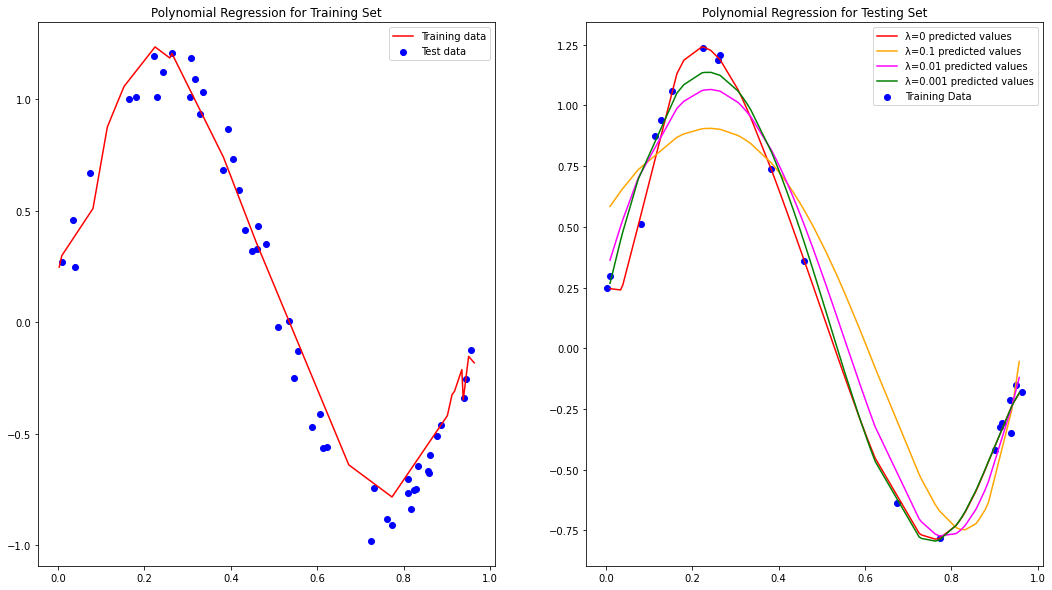

In [34]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m9_0 = df_predicted_m9_0.sort_values(by=['X'])
df_pred_sort_m9_01 = df_predicted_m9_01.sort_values(by=['X'])
df_pred_sort_m9_001 = df_predicted_m9_001.sort_values(by=['X'])
df_pred_sort_m9_0001 = df_predicted_m9_0001.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m9_0['X'], df_pred_sort_m9_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m9_01['X'], df_pred_sort_m9_01['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m9_001['X'], df_pred_sort_m9_001['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m9_0001['X'], df_pred_sort_m9_0001['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=0.1 predicted values', 'λ=0.01 predicted values', 'λ=0.001 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### Study the effect of regularization parameter λ on testing RMSE and flexibility of curve

##### λ = 0

In [35]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0['Y_predicted']), Y_test),index=['y predicted m9 λ0','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ0'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ0 = 0

rmse_m9_λ0 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ0 = math.sqrt(rmse_m9_λ0)
rmse_m9_λ0

0.10422002868505607

##### λ = 0.01

In [36]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_01['Y_predicted']), Y_test),index=['y predicted m9 λ0.01','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ0.01'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ01 = 0

rmse_m9_λ01 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ01 = math.sqrt(rmse_m9_λ01)
rmse_m9_λ01

0.24996652812284503

##### λ = 0.001

In [37]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_001['Y_predicted']), Y_test),index=['y predicted m9 λ0.001','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ0.001'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ001 = 0

rmse_m9_λ001 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ001 = math.sqrt(rmse_m9_λ001)
rmse_m9_λ001

0.14170712278874611

##### λ = 0.0001

In [38]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0['Y_predicted']), Y_test),index=['y predicted m9 λ0.0001','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ0.0001'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ0001 = 0

rmse_m9_λ0001 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ0001 = math.sqrt(rmse_m9_λ0001)
rmse_m9_λ0001

0.10422002868505607

# MULTIVARIATE CASE

### M=1: Y = $β_{0}$ + $β_{1}$$x_{1}$
### M=2: Y = $β_{0}$ + $β_{1}$$x_{1}$ + $β_{2}$$x_{2}$ + $β_{11}$$x_{1}^{2}$ + $β_{22}$$x_{2}^{2}$ + $β_{12}$${x_{1}}$$x_{2}$
### M=5: Y = $β_{0}$ + $β_{1}$$x_{1}$ + $β_{2}$$x_{2}$ + $β_{3}$$x_{3}$ + $β_{4}$$x_{4}$ +$β_{5}$$x_{5}$ + $β_{11}$$x_{1}^{2}$ + $β_{22}$$x_{2}^{2}$ + $β_{33}$$x_{3}^{2}$ + $β_{44}$$x_{4}^{4}$ + $β_{55}$$x_{5}^{2}$ + ...

## A. Construct the training set T = { ($x_{1}$, $y_{1}$), ($x_{2}$, $y_{2}$), ... , ($x_{20}$, $y_{20}$)} using the relation :

##$Y_{i}$  = sin(2 π ||$x_{i}$||) + $ε_{i}$ where $ε_{i}$ ~ N(0,0.25) and $x_{i}^1$, $x_{i}^2$ are from U[0, 1].


##In the similar way construct a testing set of size 50
## i,e. Test = {($x_{1}$, $y_{1}$), ($x_{2}$, $y_{2}$), ... , ($x_{50}$, $y_{50}$)}}

In [51]:
# uniform distribution of 20 real number
X_train = []
Y_train =[]

X1_train=np.random.uniform(0,1,20)
X2_train=np.random.uniform(0,1,20)

for x_val in zip(X1_train, X2_train):
  res = math.sqrt((x_val[0]**2) + (x_val[1]**2))
  X_train.append(res)

for x_val in X_train:
    Yi = math.sin(2 * math.pi * x_val) + np.random.uniform(0, 0.25) 
    Y_train.append(Yi)

# For better understanding, let's convert X and Y training dataset into a dataframe
df_train = pd.DataFrame(data=(X_train,Y_train),index=['X_train','Y_train'])
df_train = df_train.T
df_train

,X_train,Y_train
0,0.972762,-0.038077
1,0.790808,-0.915915
2,0.881335,-0.639947
3,0.374982,0.795754
4,0.843744,-0.771507
5,0.288795,1.189777
6,0.863083,-0.508945
7,0.679383,-0.679038
8,0.830061,-0.833360
9,0.512091,0.123813


## B) Obtain the prediction on testing set and compute the RMSE for regularized least squared polynomial regression models for order M =1, 2 and 5 . Also plot the estimated function and target function for the training set and testing set.

In [ ]:
# Least Square Polynomial Regression
def regularized_LSPR(x_dataset, y_dataset, degree, Lambda):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  lam_I = np.identity(degree+1)*Lambda
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X = np.add(X_Trans_X, lam_I)
  X_Trans_X_Inv = X_Trans_X.I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

reg_LSP_ord_1_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 0))
reg_LSP_ord_1_01 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 0.01))
reg_LSP_ord_1_001= np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 0.001))

reg_LSP_ord_2_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 0))
reg_LSP_ord_2_01 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 0.01))
reg_LSP_ord_2_001= np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 0.001))

reg_LSP_ord_5_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 0))
reg_LSP_ord_5_01 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 0.01))
reg_LSP_ord_5_001= np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 0.001))

# Real World Dataset

## Consider the motorcycle dataset. Estimate the Regularized Least Square regression models using the n sigmoidal basis functions. A variant of sigmoidal basis function can be obtained using 

## σ(a, b, x) = $a^{T}$x + b , a ∈ $R^{n}$, b ∈ R for x ∈ $R^{n}$


##I. Plot the estimated function and obtain the training RMSE error for n = 2, 5 , 10. What happens when you increase the number of basis functions.

## II. For n =10, find the minimum mean and standard deviations of RMSE, NMSE and R2 using leave-one out method by tunning the parameter λ.